# Observation of a charge-neutral muon polaron complex in antiferromagnetic Cr$_2$O$_3$
## Supplemental material: Effect of the choice of exchange-correlation functional on the local field predictions in the charge-neutral muon state in Cr$_2$O$_3$

M. H. Dehn$^{1, 2, 3}$ J. K. Shenton$^{4,*}$ S. Holenstein$^{5,6}$ Q. N. Meier$^4$ D. J. Arseneau$^3$ D. L. Cortie$^{1, 2, 7, †}$ B. Hitti$^3$ A. C. Y. Fang$^{1, ‡}$ W. A. MacFarlane$^{2, 3, 7}$ R. M. L. McFadden$^{2, 7}$ G.
D. Morris$^3$ Z. Salman$^6$ H. Luetkens$^6$ N. A. Spaldin$^4$ M. Fechner$^{4, 8}$ and R. F. Kiefl$^{1, 2, 3}$


$^1$Department of Physics and Astronomy, University of British Columbia, Vancouver, BC V6T 1Z1, Canada    
$^2$Stewart Blusson Quantum Matter Institute, University of British Columbia, Vancouver, BC V6T 1Z4, Canada    
$^3$<span style="font-variant:small-caps;">Triumf</span>, Vancouver, BC V6T 2A3, Canada   
$^4$Department of Materials, ETH Zürich, CH-8093 Zürich, Switzerland   
$^5$Physik-Institut der Universität Zürich, CH-8057, Zürich, Switzerland   
$^6$Laboratory for Muon Spin Spectroscopy, Paul Scherrer Institut, 5232, Villigen PSI, Switzerland   
$^7$Department of Chemistry, University of British Columbia, Vancouver, BC, V6T 1Z1, Canada    
$^8$Max Planck Institute for the Structure and Dynamics of Matter, 22761 Hamburg, Germany   
$^†$ Present address: Institute for Superconducting and Electronic
Materials, Australian Institute for Innovative Materials, University of Wollongong, North Wollongong, NSW 2500, Australia    
$^‡$ Present address: Department of Physics, Simon Fraser University, Burnaby, Canada V5A 1S6




$^*$ For queries about the supplemental information in this notebook contact [J. Kane Shenton](mailto:john.shenton@mat.ethz.ch).

---

In this notebook we explore the effects of the choice of exchange-correlation (xc) functionals on the predicted local field at the muon stopping site. 

We do this for the representative case of the charge-neutral muon-polaron complex that we found in this material. In particular, we focus on the candidate stopping site labelled 'D1' in the paper. For each xc functional and each value of the Hubbard U correction, the structure was fully relaxed (both the muon and the lattice) and a self-consistent calculation subsequently performed. The converged spin density was used to estimate the dipolar and Fermi contact interactions at the muon site as outlined in the main paper. The direction of the field is then calculated and presented in terms of theta and phi, again, as defined in the paper.

The choice of sphere radius in which to integrate the spin density for the estimation of the Fermi contact interaction, and the 'exclusion' region in the dipolar term was varied between 0.3 Å and 0.7 Å which was then used to provide an estimate of the errors due to finite grid effects. 


In [1]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl

import json

# the following trick was used to store numpy arrays in json:

# class NumpyEncoder(json.JSONEncoder):
#     def default(self, obj):
#         if isinstance(obj, np.ndarray):
#             return obj.tolist()
#         return json.JSONEncoder.default(self, obj)



%matplotlib inline

In [2]:
mpl.style.use('seaborn-talk')

In [3]:
xc_functionals = {'LDA':    {'Ueff': [0,2,4,6]},
                  'PBEsol': {'Ueff': [0,2,4,6]},
                  'SCAN':   {'Ueff': [0,1,2,3]}}

## Functions

In [4]:
def results_summary(res):

    print('Uncorrected local field:')
    print('v {0:8.3f} {1:8.3f} {2:8.3f} MHz'.format(*res['v_uncorrected']))
    print('Frequency    = {0:8.3f} MHz'.format(np.linalg.norm(res['v_uncorrected'])))
    print('theta dipole = {0:8.3f} deg'.format(res['theta_uncorrected']))
    print('phi dipole   = {0:8.3f} deg'.format(res['phi_uncorrected']%60))

    print('\nContact term: {0:8.8f} MHz\n'.format(res['contact']))

    print('Contact corrected local field:')
    print('v {0:8.3f} {1:8.3f} {2:8.3f} MHz'.format(*res['v']))
    print('Frequency    = {0:8.3f} MHz'.format(np.linalg.norm(res['v'])))
    print('theta dipole = {0:8.3f} deg'.format(res['theta']))
    print('phi dipole   = {0:8.3f} deg'.format(res['phi']%60))


## Read in the results

In [5]:
with open('./convergence_tests/xc_field_estimates/integrated_field_estimation_xc_functional_results.json') as f:
    spin_integration_res = json.load(f)
with open('./convergence_tests/xc_field_estimates/integrated_field_estimation_xc_functional_results_rcut_0.3.json') as f:
    spin_integration_res_3 = json.load(f)
with open('./convergence_tests/xc_field_estimates/integrated_field_estimation_xc_functional_results_rcut_0.7.json') as f:
    spin_integration_res_7 = json.load(f)

## Plot results

### f contact

We start by plotting the Fermi contact interaction estimated for the different xc functionals.


 LDA
[[  0.          -0.30874717]
 [  2.         -38.28992361]
 [  4.         -35.55283688]
 [  6.         -28.45386579]]

 PBEsol
[[  0.          13.55603697]
 [  2.         -35.68551055]
 [  4.         -29.90866122]
 [  6.         -23.41847503]]

 SCAN
[[  0.         -40.1610933 ]
 [  1.         -38.02962314]
 [  2.         -35.15416148]
 [  3.         -31.63062357]]


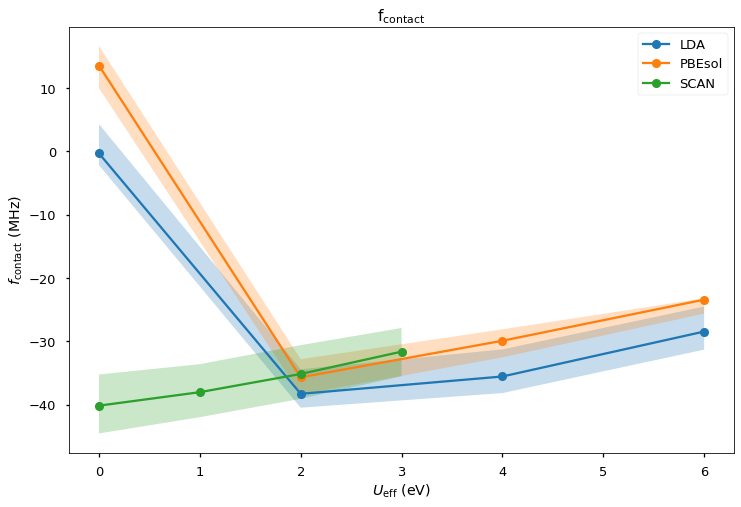

In [6]:
fig, ax = plt.subplots()
for xc in xc_functionals.keys(): # loop over xc
    contacts_3 = np.array([[u,spin_integration_res_3[xc][str(u)]['contact']] for u in xc_functionals[xc]['Ueff']])
    contacts = np.array([[u,spin_integration_res[xc][str(u)]['contact']] for u in xc_functionals[xc]['Ueff']])
    contacts_7 = np.array([[u,spin_integration_res_7[xc][str(u)]['contact']] for u in xc_functionals[xc]['Ueff']])
    
    ax.fill_between(contacts.T[0], contacts_7.T[1], contacts_3.T[1], alpha=0.25)
    ax.plot(contacts.T[0], contacts.T[1], label = xc, marker = 'o')
    print('\n',xc)
    print(contacts)
    
ax.legend()
ax.set_ylabel(r'$f_\mathrm{contact}$ (MHz)')
ax.set_xlabel(r'$U_\mathrm{eff}$ (eV)')
ax.set_title('f$_\mathrm{contact}$')
fig.tight_layout()

### f dipole

Let's now plot the dipolar contribution to the magnetic field at the muon site, for the different xc functionals.


 LDA
[[ 0.         83.27584394]
 [ 2.         63.08961768]
 [ 4.         72.55136376]
 [ 6.         77.52950898]]

 PBEsol
[[ 0.         66.52202692]
 [ 2.         72.53014448]
 [ 4.         79.5251848 ]
 [ 6.         84.37559408]]

 SCAN
[[ 0.         71.65120309]
 [ 1.         75.94177689]
 [ 2.         78.61392694]
 [ 3.         81.92751334]]


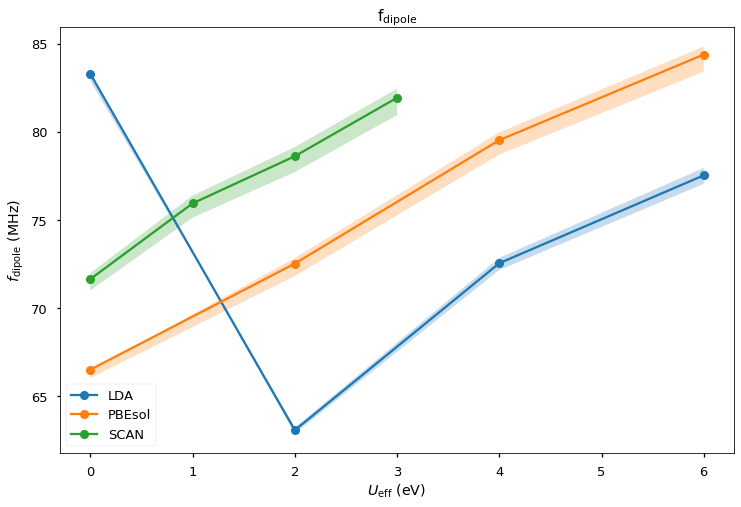

In [7]:
fig, ax = plt.subplots()
for xc in xc_functionals.keys(): # loop over xc
    fdip_3 = np.array([[u,np.linalg.norm(spin_integration_res_3[xc][str(u)]['v_uncorrected'])] 
                       for u in xc_functionals[xc]['Ueff']])
    fdip   = np.array([[u,np.linalg.norm(spin_integration_res[  xc][str(u)]['v_uncorrected'])] 
                       for u in xc_functionals[xc]['Ueff']])
    fdip_7 = np.array([[u,np.linalg.norm(spin_integration_res_7[xc][str(u)]['v_uncorrected'])] 
                       for u in xc_functionals[xc]['Ueff']])
    
    ax.fill_between(fdip.T[0], fdip_7.T[1], fdip_3.T[1], alpha=0.25)
    ax.plot(fdip.T[0], fdip.T[1], label = xc, marker = 'o')
    print('\n',xc)
    print(fdip)
    
ax.legend()
ax.set_ylabel(r'$f_\mathrm{dipole}$ (MHz)')
ax.set_xlabel(r'$U_\mathrm{eff}$ (eV)')
ax.set_title('f$_\mathrm{dipole}$')
fig.tight_layout()

### f total


 LDA
[[ 0.         71.65120309]
 [ 1.         75.94177689]
 [ 2.         78.61392694]
 [ 3.         81.92751334]]

 PBEsol
[[ 0.         71.65120309]
 [ 1.         75.94177689]
 [ 2.         78.61392694]
 [ 3.         81.92751334]]

 SCAN
[[ 0.         71.65120309]
 [ 1.         75.94177689]
 [ 2.         78.61392694]
 [ 3.         81.92751334]]


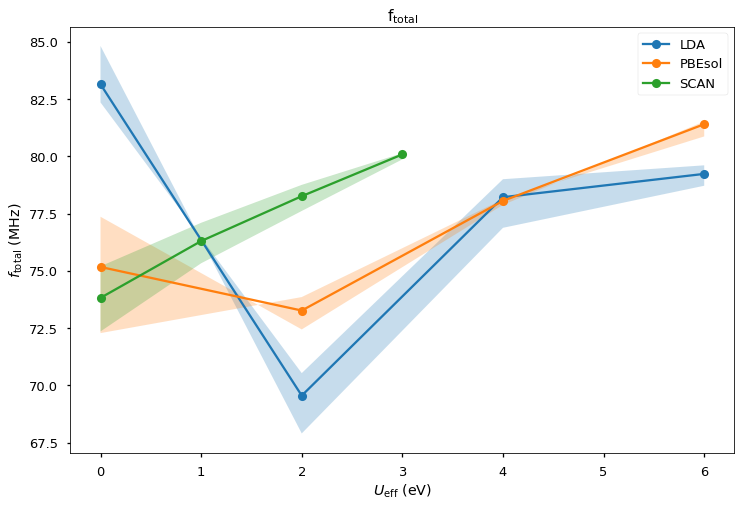

In [8]:
fig, ax = plt.subplots()
for xc in xc_functionals.keys(): # loop over xc
    ftot_3 = np.array([[u,np.linalg.norm(spin_integration_res_3[xc][str(u)]['v'])] 
                       for u in xc_functionals[xc]['Ueff']])
    ftot   = np.array([[u,np.linalg.norm(spin_integration_res[  xc][str(u)]['v'])] 
                       for u in xc_functionals[xc]['Ueff']])
    ftot_7 = np.array([[u,np.linalg.norm(spin_integration_res_7[xc][str(u)]['v'])] 
                       for u in xc_functionals[xc]['Ueff']])
    
    ax.fill_between(ftot.T[0], ftot_7.T[1], ftot_3.T[1], alpha=0.25)
    ax.plot(ftot.T[0], ftot.T[1], label = xc, marker = 'o')
    print('\n',xc)
    print(fdip)
    
ax.legend()
ax.set_ylabel(r'$f_\mathrm{total}$ (MHz)')
ax.set_xlabel(r'$U_\mathrm{eff}$ (eV)')
ax.set_title('f$_\mathrm{total}$')
fig.tight_layout()


### theta


 LDA
[[ 0.         71.65120309]
 [ 1.         75.94177689]
 [ 2.         78.61392694]
 [ 3.         81.92751334]]

 PBEsol
[[ 0.         71.65120309]
 [ 1.         75.94177689]
 [ 2.         78.61392694]
 [ 3.         81.92751334]]

 SCAN
[[ 0.         71.65120309]
 [ 1.         75.94177689]
 [ 2.         78.61392694]
 [ 3.         81.92751334]]


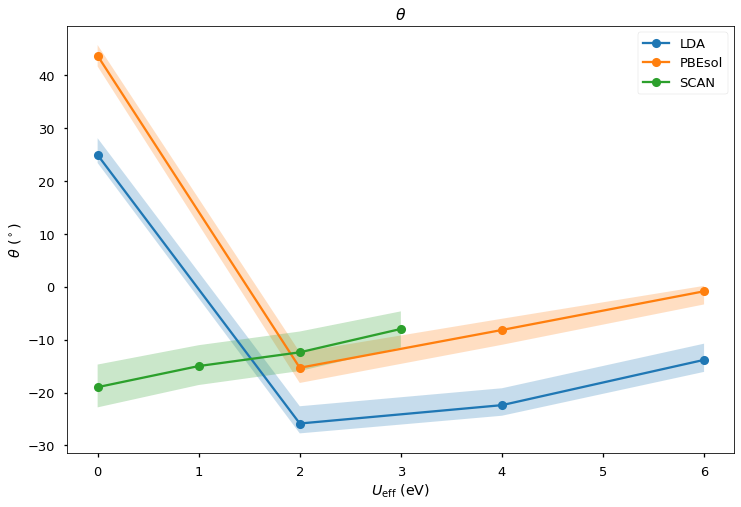

In [9]:
fig, ax = plt.subplots()
for xc in xc_functionals.keys(): # loop over xc
    t_3 = np.array([[u,spin_integration_res_3[xc][str(u)]['theta']] for u in xc_functionals[xc]['Ueff']])
    t   = np.array([[u,spin_integration_res[  xc][str(u)]['theta']] for u in xc_functionals[xc]['Ueff']])
    t_7 = np.array([[u,spin_integration_res_7[xc][str(u)]['theta']] for u in xc_functionals[xc]['Ueff']])
    
    ax.fill_between(t.T[0], t_7.T[1], t_3.T[1], alpha=0.25)
    ax.plot(t.T[0], t.T[1], label = xc, marker = 'o')
    print('\n',xc)
    print(fdip)
    
ax.legend()
ax.set_ylabel(r'$\theta$ ($^\circ$)')
ax.set_xlabel(r'$U_\mathrm{eff}$ (eV)')
ax.set_title(r'$\theta$')
fig.tight_layout()

### phi


 LDA
[[ 0.         71.65120309]
 [ 1.         75.94177689]
 [ 2.         78.61392694]
 [ 3.         81.92751334]]

 PBEsol
[[ 0.         71.65120309]
 [ 1.         75.94177689]
 [ 2.         78.61392694]
 [ 3.         81.92751334]]

 SCAN
[[ 0.         71.65120309]
 [ 1.         75.94177689]
 [ 2.         78.61392694]
 [ 3.         81.92751334]]


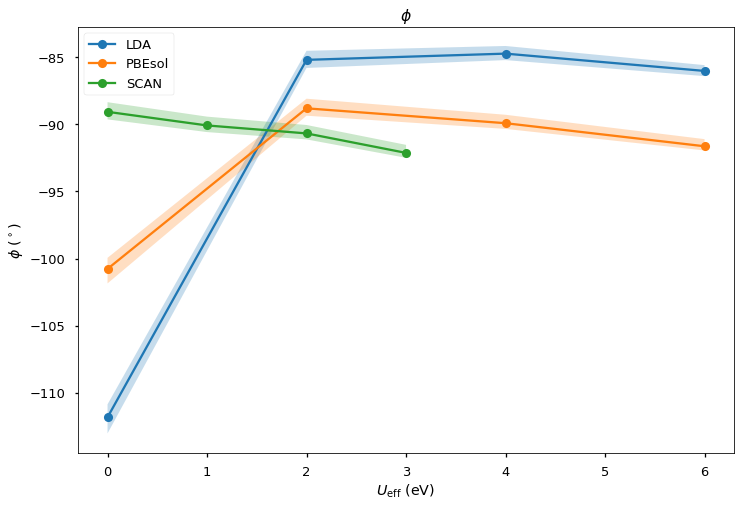

In [10]:
fig, ax = plt.subplots()
for xc in xc_functionals.keys(): # loop over xc
    phi_3 = np.array([[u, spin_integration_res_3[xc][str(u)]['phi']] for u in xc_functionals[xc]['Ueff']])
    phi   = np.array([[u, spin_integration_res[  xc][str(u)]['phi']] for u in xc_functionals[xc]['Ueff']])
    phi_7 = np.array([[u, spin_integration_res_7[xc][str(u)]['phi']] for u in xc_functionals[xc]['Ueff']])
    
    ax.fill_between(phi.T[0], phi_7.T[1], phi_3.T[1], alpha=0.25)
    ax.plot(phi.T[0], phi.T[1], label = xc, marker = 'o')
    print('\n',xc)
    print(fdip)
    
ax.legend()
ax.set_ylabel(r'$\phi$ ($^\circ$)')
ax.set_xlabel(r'$U_\mathrm{eff}$ (eV)')
ax.set_title(r'$\phi$')
fig.tight_layout()
